In [2]:
import os

os.chdir("../..")

In [3]:
%pip install umap-learn[plot]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
import umap

from tokenizers import AbsolutePenPositionTokenizer, DeltaPenPositionTokenizer

In [5]:
model = torch.load(
    "logs/sketch_transformer_example0/SketchTransformer_AbsolutePenPositionTokenizer-q32_checkpoint19.pth",
    weights_only=False,
)

tokenizer = AbsolutePenPositionTokenizer(bins=32)

embeddings = model.embed.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="cosine", random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

c:\Users\matth\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


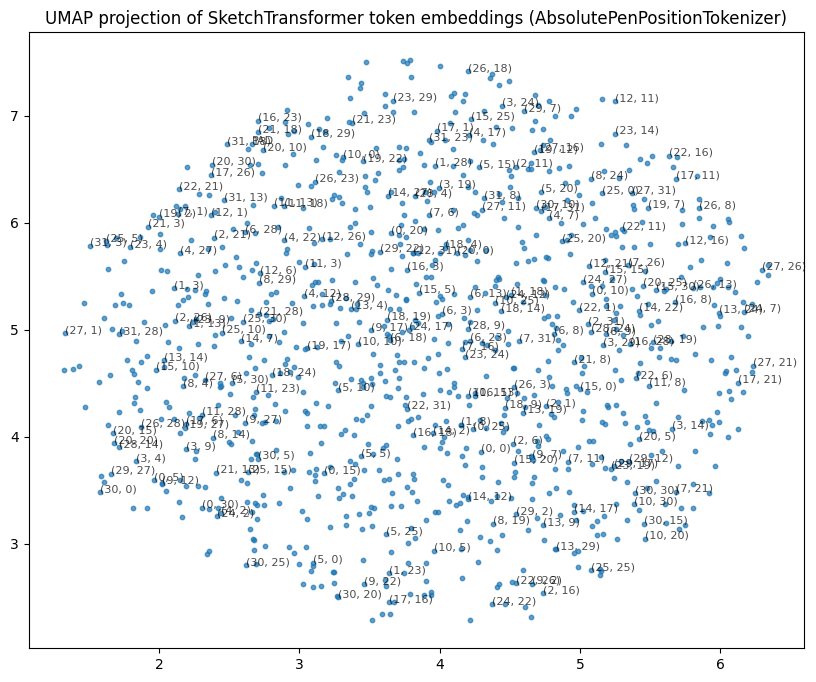

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10, alpha=0.7)

for i in range(
    0, len(embedding_2d), max(1, len(embedding_2d) // 200)
):  # only sample some labels
    plt.text(
        embedding_2d[i, 0],
        embedding_2d[i, 1],
        tokenizer.inv_vocab[i],
        fontsize=8,
        alpha=0.7,
    )

plt.title(
    f"UMAP projection of SketchTransformer token embeddings ({tokenizer.__class__.__name__})"
)
plt.show()

In [9]:
model = torch.load(
    "logs/sketch_transformer_example1/SketchTransformer_DeltaPenPositionTokenizer-q32_checkpoint14.pth",
    weights_only=False,
)

tokenizer = DeltaPenPositionTokenizer(bins=32)

embeddings = model.embed.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_neighbors=5, min_dist=0.1, metric="cosine", random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

c:\Users\matth\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


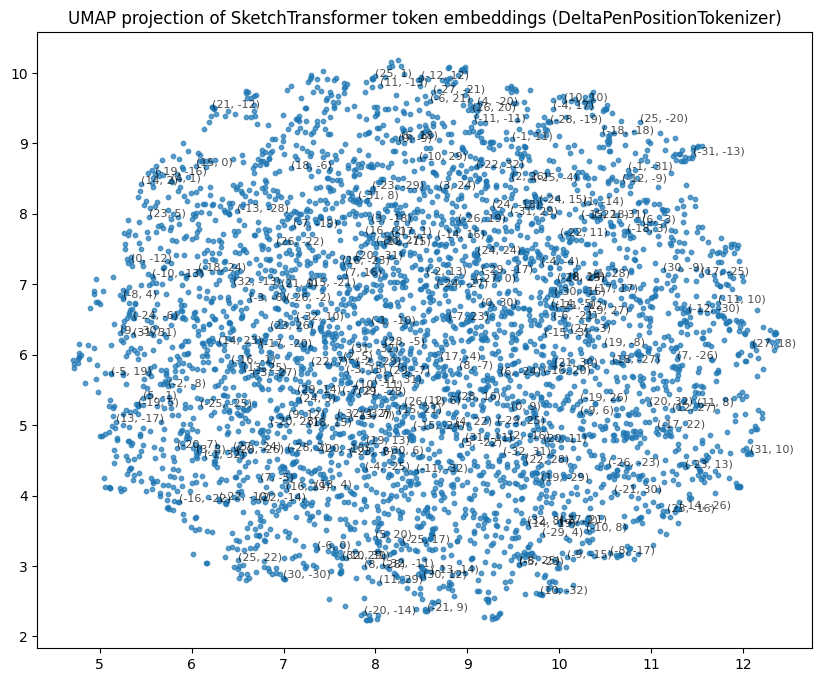

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10, alpha=0.7)

for i in range(
    0, len(embedding_2d), max(1, len(embedding_2d) // 200)
):  # only sample some labels
    plt.text(
        embedding_2d[i, 0],
        embedding_2d[i, 1],
        tokenizer.inv_vocab[i],
        fontsize=8,
        alpha=0.7,
    )

plt.title(
    f"UMAP projection of SketchTransformer token embeddings ({tokenizer.__class__.__name__})"
)
plt.show()